## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = mouse_study['Mouse ID'].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice_id = dup_mice.loc[:, 'Mouse ID'].drop_duplicates()
dup_mice_id

909    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. # dup_mice_id.values[0] == 'g989' #
dup_mice = mouse_study.loc[mouse_study['Mouse ID'] == dup_mice_id.values[0], :]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cond = mouse_study['Mouse ID'].isin(dup_mice['Mouse ID'])
clean_mouse = mouse_study.drop(mouse_study[cond].index)
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_mouse['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = clean_mouse.groupby(['Drug Regimen'])

drug_stats_summ = pd.DataFrame()
drug_stats_summ['Mean'] = drug_group['Tumor Volume (mm3)'].mean()
drug_stats_summ['Median'] = drug_group['Tumor Volume (mm3)'].median()
drug_stats_summ['Variance'] = drug_group['Tumor Volume (mm3)'].var()
drug_stats_summ['Std Dev'] = drug_group['Tumor Volume (mm3)'].std()
drug_stats_summ['SEM'] = drug_group['Tumor Volume (mm3)'].sem()
drug_stats_summ.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], drug_stats_summ.columns.tolist()])
pd.options.display.float_format = '{:.2f}'.format
drug_stats_summ

Tumor Volume (mm3)                             
                           Mean Median Variance Std Dev  SEM
Drug Regimen                                                
Capomulin                 40.68  41.56    24.95    4.99 0.33
Ceftamin                  52.59  51.78    39.29    6.27 0.47
Infubinol                 52.88  51.82    43.13    6.57 0.49
Ketapril                  55.24  53.70    68.55    8.28 0.60
Naftisol                  54.33  52.51    66.17    8.13 0.60
Placebo                   54.03  52.29    61.17    7.82 0.58
Propriva                  52.32  50.45    43.85    6.62 0.54
Ramicane                  40.22  40.67    23.49    4.85 0.32
Stelasyn                  54.23  52.43    59.45    7.71 0.57
Zoniferol                 53.24  51.82    48.53    6.97 0.52

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped_drug = clean_mouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std', 'sem']})
grouped_drug

Tumor Volume (mm3)                       
                           mean median   var  std  sem
Drug Regimen                                          
Capomulin                 40.68  41.56 24.95 4.99 0.33
Ceftamin                  52.59  51.78 39.29 6.27 0.47
Infubinol                 52.88  51.82 43.13 6.57 0.49
Ketapril                  55.24  53.70 68.55 8.28 0.60
Naftisol                  54.33  52.51 66.17 8.13 0.60
Placebo                   54.03  52.29 61.17 7.82 0.58
Propriva                  52.32  50.45 43.85 6.62 0.54
Ramicane                  40.22  40.67 23.49 4.85 0.32
Stelasyn                  54.23  52.43 59.45 7.71 0.57
Zoniferol                 53.24  51.82 48.53 6.97 0.52

## Bar and Pie Charts

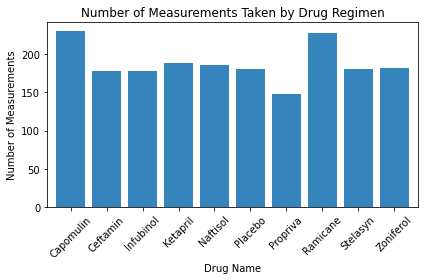

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = drug_group['Drug Regimen'].count()
drug_bar_chart = drug_count.plot(kind='bar', width=.8, alpha=.9, rot=45, title="Number of Measurements Taken by Drug Regimen")
drug_bar_chart.set_xlabel("Drug Name")
drug_bar_chart.set_ylabel("Number of Measurements")

plt.tight_layout()
plt.savefig('PandasBar')
plt.show()

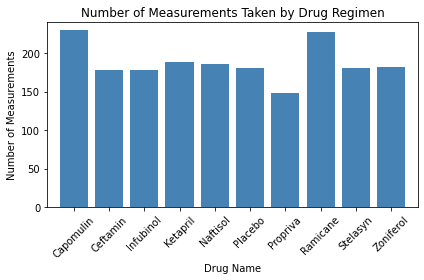

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_group))

plt.bar(x_axis, drug_count, color='steelblue', alpha=1, align="center")
plt.xticks(x_axis, drug_count.index, rotation=45)

# Set x and y limits
plt.xlim(-0.75, len(drug_group)-.25)
plt.ylim(0, max(drug_count)+10)

# Set a Title and labels
plt.title("Number of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Measurements")

# show the graph
plt.tight_layout()
plt.savefig('PyplotBar')
plt.show()

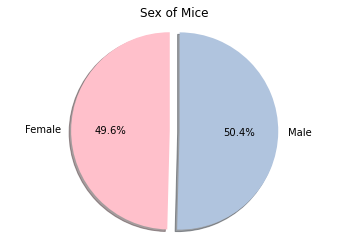

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mouse.groupby('Sex')
gender_count = gender_group['Mouse ID'].nunique()

# Create a bar chart based off of the group series from before
ax = gender_count.plot.pie(shadow=True, startangle=90, colors=['pink', 'lightsteelblue'], 
                      explode=(0, 0.1), autopct='%1.1f%%')
ax.set_ylabel('')
plt.title('Sex of Mice')
plt.axis('equal')
plt.savefig('PandasPie')
plt.show()

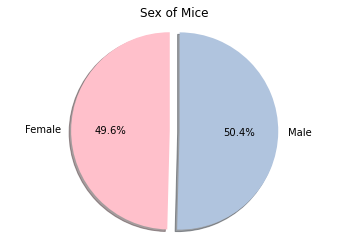

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels=['Female', 'Male'], shadow=True, startangle=90, colors=['pink', 'lightsteelblue'], 
        explode=(0, 0.1), autopct="%1.1f%%")
plt.title("Sex of Mice")
plt.axis("equal")
plt.savefig('PyplotPie')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin
# Get all rows with 4 treatments form clean dataframe
four_regimens = clean_mouse.loc[(clean_mouse['Drug Regimen'] == 'Capomulin') | (clean_mouse['Drug Regimen'] == 'Ramicane')
                              | (clean_mouse['Drug Regimen'] == 'Infubinol') | (clean_mouse['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
# Series: Mouse ID is index, Max Timepoint is column #
max_tps = four_regimens.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_tp_merge = pd.merge(max_tps, clean_mouse, on=('Mouse ID', 'Timepoint'), how='left')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []
box_tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = four_tp_merge.loc[four_tp_merge['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    quartiles = tumor_vols.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"{treatment} Tumor Volume (mm3) lower quartile: {lowerq:1.2f}")
    print(f"{treatment} Tumor Volume (mm3) upper quartile:: {upperq:1.2f}")
    print(f"{treatment} Tumor Volume (mm3) IQR: {iqr:1.2f}")
    print(f"{treatment} Tumor Volume (mm3) median: {quartiles[0.5]:1.2f} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{treatment} values below {lower_bound:1.2f} could be outliers.")
    print(f"{treatment} values above {upper_bound:1.2f} could be outliers.")
    print("---------------------------------------------------------------")
    
    # add subset
    box_tumor_vols.append(tumor_vols)

Capomulin Tumor Volume (mm3) lower quartile: 32.38
Capomulin Tumor Volume (mm3) upper quartile:: 40.16
Capomulin Tumor Volume (mm3) IQR: 7.78
Capomulin Tumor Volume (mm3) median: 38.13 
Capomulin values below 20.70 could be outliers.
Capomulin values above 51.83 could be outliers.
---------------------------------------------------------------
Ramicane Tumor Volume (mm3) lower quartile: 31.56
Ramicane Tumor Volume (mm3) upper quartile:: 40.66
Ramicane Tumor Volume (mm3) IQR: 9.10
Ramicane Tumor Volume (mm3) median: 36.56 
Ramicane values below 17.91 could be outliers.
Ramicane values above 54.31 could be outliers.
---------------------------------------------------------------
Infubinol Tumor Volume (mm3) lower quartile: 54.05
Infubinol Tumor Volume (mm3) upper quartile:: 65.53
Infubinol Tumor Volume (mm3) IQR: 11.48
Infubinol Tumor Volume (mm3) median: 60.17 
Infubinol values below 36.83 could be outliers.
Infubinol values above 82.74 could be outliers.
-------------------------------

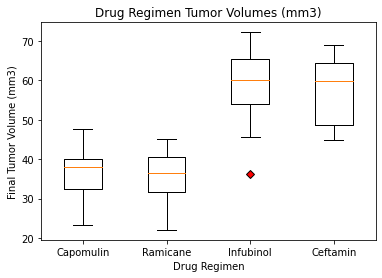

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen Tumor Volumes (mm3)')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(box_tumor_vols, labels=treatments,flierprops=red_diamond)

plt.savefig('BoxPlot')
plt.show()

## Line and Scatter Plots

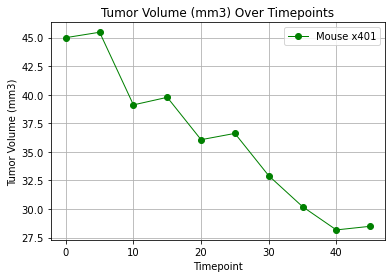

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_line = four_regimens.loc[four_regimens['Mouse ID'] == 'x401', ['Timepoint', 'Tumor Volume (mm3)']]
x_axis = mouse_line['Timepoint']
y_axis = mouse_line['Tumor Volume (mm3)']

mouse, = plt.plot(x_axis, y_axis, marker="o", color="green", linewidth=1, label="Mouse x401")
plt.title("Tumor Volume (mm3) Over Timepoints")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[mouse], loc="best")

plt.grid()
plt.savefig('LinePlot')
plt.show()

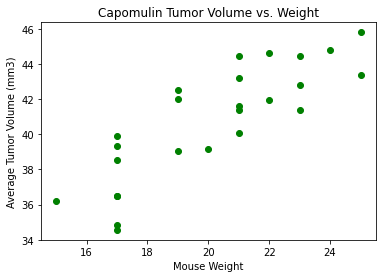

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_only = four_regimens.loc[four_regimens['Drug Regimen'] == 'Capomulin', 
                                 ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
cap_avg = cap_only.groupby(['Mouse ID']).mean()
mouse_weight = cap_avg['Weight (g)']
avg_tumor_vol = cap_avg['Tumor Volume (mm3)']

fig1, ax2 = plt.subplots()
plt.title("Capomulin Tumor Volume vs. Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(mouse_weight, avg_tumor_vol, marker="o", color='green')

plt.savefig('ScatterPlot')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corcoef = round(st.pearsonr(mouse_weight, avg_tumor_vol)[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {corcoef}")

# Perform a linear regression on mouse weight versus average tumor volume
wt_slope, wt_int, wt_r, wt_p, wt_std_err = st.linregress(mouse_weight, avg_tumor_vol)

# Create equation of line to calculate predicted average tumor volume
wt_fit = wt_slope * mouse_weight + wt_int

# Create line equation string
line_eq = "y = " + str(round(wt_slope,2)) + "x + " + str(round(wt_int,2))

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


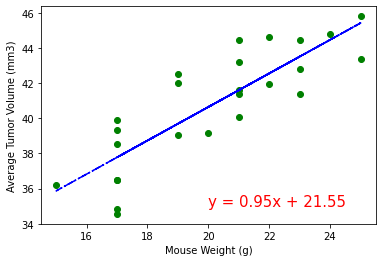

In [19]:
# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight, avg_tumor_vol, color = 'green')
plt.plot(mouse_weight, wt_fit, "-.", color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.savefig('LinearScatterPlot')
plt.show()